In [135]:
from typing import final, List, Dict


class Target:

    def __init__(self, target, w: float):
        self.target: final = target
        self.w: final = w

    def fire(self, dt, voltage):
        self.target.add_charge(self.w * voltage * dt)


class LIF:

    def __init__(self, name: str, vref: float, vth: float, tau: float, r: float, spike: float):
        self.name: final = name
        self.vref: final = vref
        self.vth: final = vth
        self.tau: final = tau
        self.r: final = r
        self.spike: final = spike

        self.targets: List[Target] = []
        self.v = vref
        self.fire = 0

        self.indexes = []
        self.values = []
        self.spikes = []

    def add_target(self, target, w: float):
        self.targets.append(Target(target, w))

    def add_charge(self, charge: float):
        self.v += charge * self.r / self.tau

    def tick(self, dt):
        if self.v >= self.vth:
            for t in self.targets:
                t.fire(dt, self.spike)
            self.fire += 1
            self.v = self.vref
            self.add_record(dt, self.vth)
            self.add_record(0, self.vref)
        else:
            self.v -= (self.v - self.vref) / self.tau * dt
            self.add_record(dt, self.v)

    def add_record(self, dt, v):
        old = 0 if len(self.indexes) == 0 else self.indexes[-1]
        self.indexes.append(old + dt)
        self.values.append(v)
        if dt == 0:
            self.spikes.append(old)

    def plot(self, plt):
        plt.plot(self.indexes, self.values, '-')
        plt.plot(self.spikes, self.spikes * 0 + [self.vth] * self.fire, 'o')
        plt.plot([self.indexes[0], self.indexes[-1]], [self.vth, self.vth], '--')
        plt.legend(["neuron voltage", "output spikes", "threshold"], loc="lower right")
        plt.title(f'{self.name} fires {self.fire} times')


class CurrentSource:

    def __init__(self, func):
        self.func = func
        self.targets: List[LIF] = []

    def add_target(self, target: LIF):
        self.targets.append(target)

    def tick(self, dt, time):
        val = self.func(time)
        for t in self.targets:
            t.add_charge(dt * val)


class Network:

    def __init__(self, dt: float, n: int):
        self.n: final = n
        self.dt: final = dt
        self.sources: List[CurrentSource] = []
        self.neurons: Dict[str, LIF] = {}

        self.time = 0

    def add_node(self, node: LIF):
        self.neurons[node.name] = node

    def tick(self):
        for s in self.sources:
            s.tick(self.dt, self.time)
        for v in self.neurons:
            self.neurons[v].tick(self.dt)
        self.time += 1

    def simulate(self):
        for i in range(self.n):
            self.tick()


In [136]:

def hw1q1a():
    network = Network(dt=1.e-4, n=20000)
    node1 = LIF("n1", vref=-65, vth=-20, tau=0.05, r=1e6, spike=1)
    network.add_node(node1)
    source = CurrentSource(lambda t: 5.e-5 if 5000 <= t < 15000 else 0)
    network.sources.append(source)
    source.add_target(node1)
    network.simulate()
    return network


def hw1q1b():
    network = Network(dt=1.e-4, n=20000)
    node1 = LIF("n1", vref=-65, vth=-30, tau=0.05, r=1e6, spike=1)
    network.add_node(node1)
    source = CurrentSource(lambda t: 5.e-5 if 5000 <= t < 15000 else 0)
    network.sources.append(source)
    source.add_target(node1)
    network.simulate()
    return network

n1 fires 16


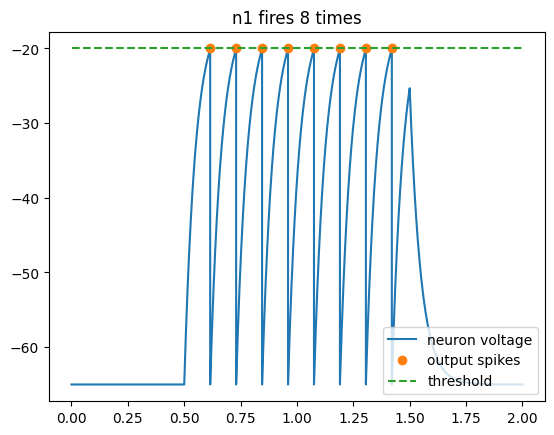

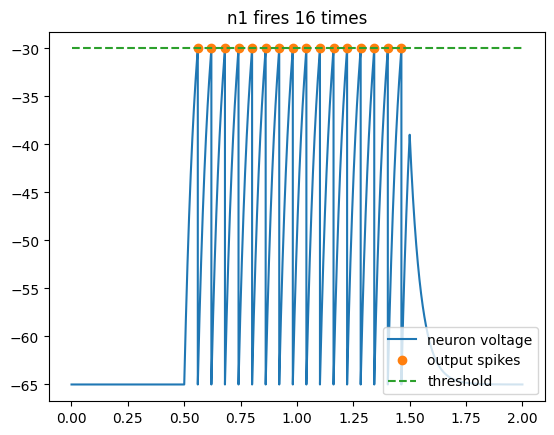

In [137]:
from matplotlib import pyplot as plt

sol = hw1q1a()
plt.figure()
sol.neurons["n1"].plot(plt)

sol = hw1q1b()
plt.figure()
sol.neurons["n1"].plot(plt)
print("n1 fires", sol.neurons["n1"].fire)


In [138]:

def hw1q2a():
    network = Network(dt=1.e-4, n=20000)

    node1 = LIF("n1", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node2 = LIF("n2", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node3 = LIF("n3", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node4 = LIF("n4", vref=-65, vth=-60, tau=0.02, r=1e7, spike=1)
    node5 = LIF("n5", vref=-65, vth=-60, tau=0.02, r=1e7, spike=1)
    node1.add_target(node4, -1e-5)
    node2.add_target(node4, 1e-4)
    node3.add_target(node4, 1e-5)
    node1.add_target(node5, 3e-5)
    node2.add_target(node5, -4e-5)
    node3.add_target(node5, 5e-5)

    source = CurrentSource(lambda t: 5.e-5 if 5000 <= t < 15000 else 0)
    source.add_target(node1)
    source.add_target(node2)
    source.add_target(node3)

    network.add_node(node1)
    network.add_node(node2)
    network.add_node(node3)
    network.add_node(node4)
    network.add_node(node5)
    network.sources.append(source)
    network.simulate()
    return network


def hw1q2b():
    network = Network(dt=1.e-4, n=20000)

    node1 = LIF("n1", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node2 = LIF("n2", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node3 = LIF("n3", vref=-65, vth=-35, tau=0.05, r=1e6, spike=1)
    node4 = LIF("n4", vref=-65, vth=-60, tau=0.02, r=1e7, spike=1)
    node5 = LIF("n5", vref=-65, vth=-60, tau=0.02, r=1e7, spike=1)
    node1.add_target(node4, 1e-5)
    node2.add_target(node4, 1e-5)
    node3.add_target(node4, 1e-5)
    node1.add_target(node5, 5e-6)
    node2.add_target(node5, 5e-6)
    node3.add_target(node5, -1e-5)

    source = CurrentSource(lambda t: 5.e-5 if 5000 <= t < 15000 else 0)
    source.add_target(node1)
    source.add_target(node2)
    source.add_target(node3)

    network.add_node(node1)
    network.add_node(node2)
    network.add_node(node3)
    network.add_node(node4)
    network.add_node(node5)
    network.sources.append(source)
    network.simulate()
    return network

n1 fires 21
n4 fires 21
n5 fires 0


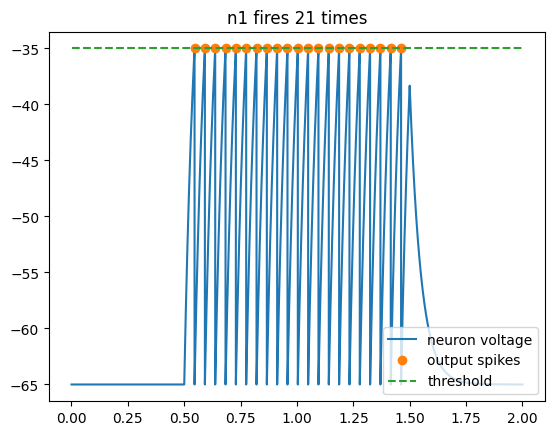

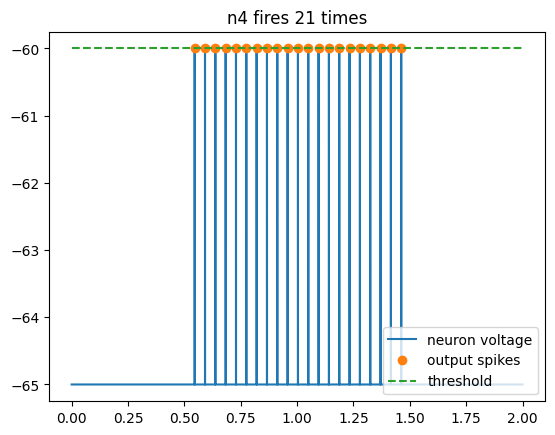

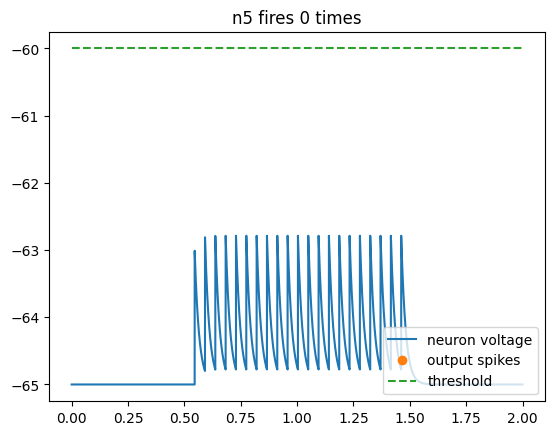

In [139]:
from matplotlib import pyplot as plt

sol = hw1q2a()

plt.figure()
sol.neurons["n1"].plot(plt)
plt.figure()
sol.neurons["n4"].plot(plt)
plt.figure()
sol.neurons["n5"].plot(plt)

print("n1 fires", sol.neurons["n1"].fire)
print("n4 fires", sol.neurons["n4"].fire)
print("n5 fires", sol.neurons["n5"].fire)


n1 fires  21
n4 fires 0
n5 fires 0


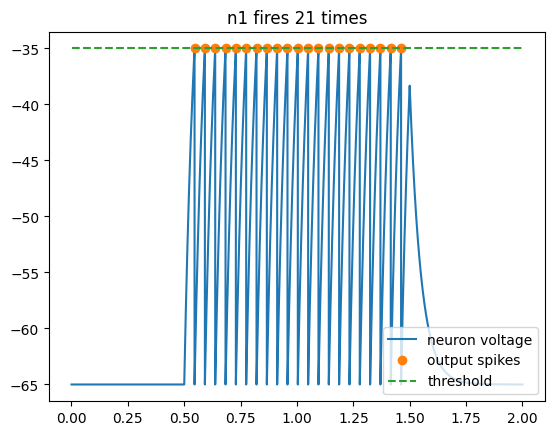

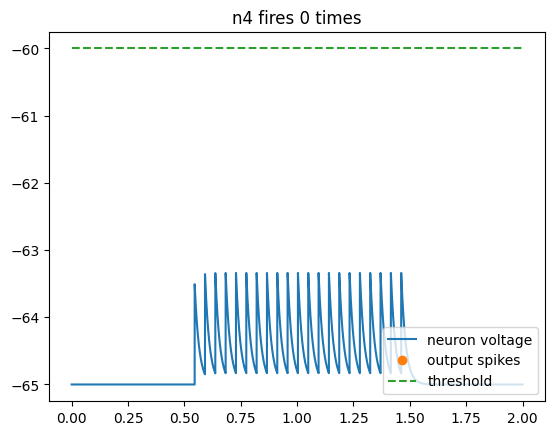

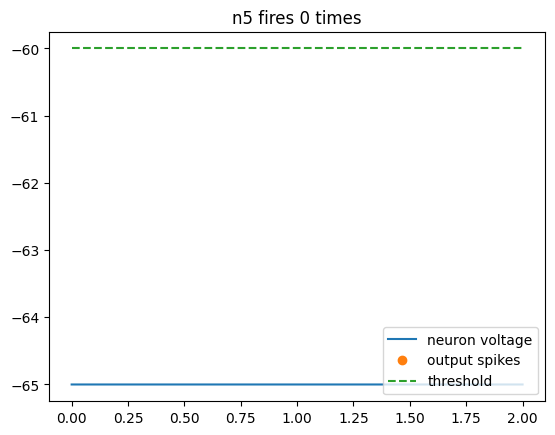

In [140]:
from matplotlib import pyplot as plt

sol = hw1q2b()

plt.figure()
sol.neurons["n1"].plot(plt)
plt.figure()
sol.neurons["n4"].plot(plt)
plt.figure()
sol.neurons["n5"].plot(plt)

print("n1 fires ", sol.neurons["n1"].fire)
print("n4 fires", sol.neurons["n4"].fire)
print("n5 fires", sol.neurons["n5"].fire)
